In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, svm
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing

import statsmodels.api as sm


In [81]:
Churn_df = pd.read_csv('Churn_Modelling.csv')
print(Churn_df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [61]:
#Check For missing values
Churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [249]:
#Convert to Categorical (Factors)
Churn_df['NumOfProducts'] = pd.Categorical(Churn_df.NumOfProducts)
Churn_df['HasCrCard'] = pd.Categorical(Churn_df.HasCrCard)
Churn_df['IsActiveMember'] = pd.Categorical(Churn_df.IsActiveMember)
Churn_df['Tenure'] = pd.Categorical(Churn_df.Tenure)
Churn_df['Gender'] = pd.Categorical(Churn_df.Gender)
Churn_df['Exited'] = pd.Categorical(Churn_df.Exited)

In [250]:
#Summary
#Churn_df.describe()
Churn_df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.0,10000.000000,10000.0,10000.0,10000.0,10000.000000,10000.0
unique,NaN,NaN,2932,NaN,3,2,NaN,11.0,NaN,4.0,2.0,2.0,NaN,2.0
top,NaN,NaN,Smith,NaN,France,Male,NaN,2.0,NaN,1.0,1.0,1.0,NaN,0.0
freq,NaN,NaN,32,NaN,5014,5457,NaN,1048.0,NaN,5084.0,7055.0,5151.0,NaN,7963.0
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,NaN,76485.889288,NaN,NaN,NaN,100090.239881,NaN
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,NaN,62397.405202,NaN,NaN,NaN,57510.492818,NaN
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,NaN,0.000000,NaN,NaN,NaN,11.580000,NaN
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,NaN,0.000000,NaN,NaN,NaN,51002.110000,NaN
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,NaN,97198.540000,NaN,NaN,NaN,100193.915000,NaN
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,NaN,127644.240000,NaN,NaN,NaN,149388.247500,NaN


In [255]:
print(Churn_df['NumOfProducts'].value_counts())
print(Churn_df['HasCrCard'].value_counts())
print(Churn_df['IsActiveMember'].value_counts())
print(Churn_df['Exited'].value_counts())
print(Churn_df['Tenure'].value_counts())
print(Churn_df['Geography'].value_counts())
print(Churn_df['Gender'].value_counts())

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
1    7055
0    2945
Name: HasCrCard, dtype: int64
1    5151
0    4849
Name: IsActiveMember, dtype: int64
0    7963
1    2037
Name: Exited, dtype: int64
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64


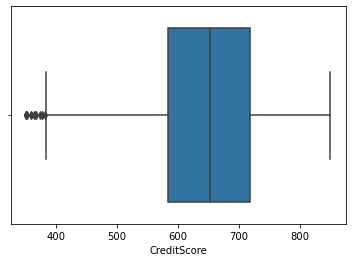

In [256]:
ax = sns.boxplot(x=Churn_df["CreditScore"])

In [257]:
ax = sns.boxplot(x=Churn_df["Tenure"])

TypeError: Horizontal orientation requires numeric `x` variable.

<AxesSubplot:xlabel='Tenure', ylabel='Count'>

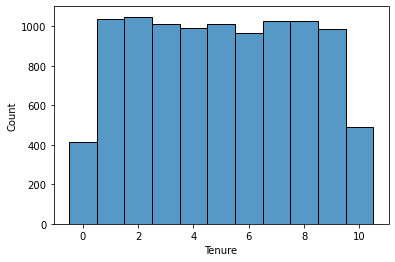

In [258]:
sns.histplot(data=Churn_df, x="Tenure")

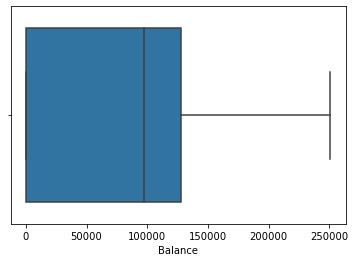

In [259]:
ax = sns.boxplot(x=Churn_df["Balance"])

<AxesSubplot:xlabel='Balance', ylabel='Count'>

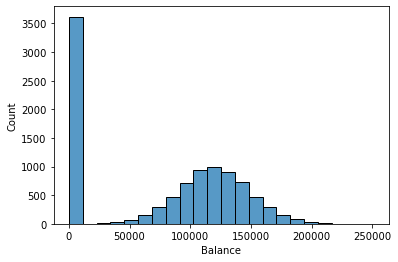

In [260]:
sns.histplot(data=Churn_df, x="Balance")

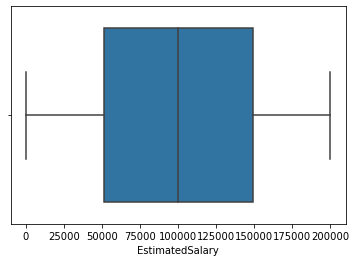

In [261]:
ax = sns.boxplot(x=Churn_df["EstimatedSalary"])

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

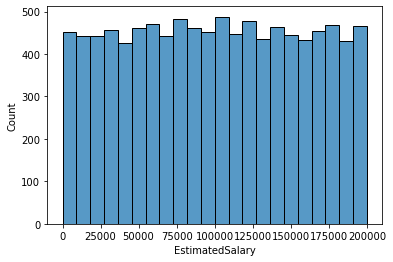

In [262]:
sns.histplot(data=Churn_df, x="EstimatedSalary")

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64


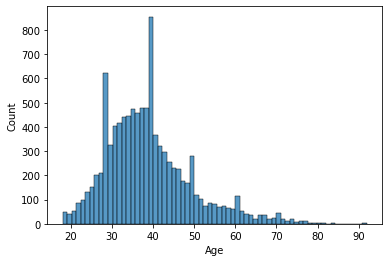

In [26]:
#Age Histogram
sns.histplot(data=Churn_df, x="Age")
print(Churn_df['Age'].value_counts())

In [82]:
# Age Binning
cut_labels_4 = ['1', '2', '3', '4','5','6']
cut_bins = [17, 30, 40, 50, 60,70,95]
Churn_df['Age_Bin'] = pd.cut(Churn_df['Age'], bins=cut_bins, labels=cut_labels_4)


In [79]:
#Churn_df.to_csv("Output.csv")


In [83]:
print(Churn_df['Age_Bin'].value_counts())

2    4451
3    2320
1    1968
4     797
5     331
6     133
Name: Age_Bin, dtype: int64


In [78]:
rslt_df = Churn_df[Churn_df['Age_Bin'] =='1']
rslt_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Bin
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,1
11,12,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0,1
13,14,15691483,Chin,549,France,Female,25,5,0.00,2,0,0,190857.79,0,1
17,18,15788218,Henderson,549,Spain,Female,24,9,0.00,2,1,1,14406.41,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,9989,15589329,Pirozzi,775,France,Male,30,4,0.00,2,1,0,49337.84,0,1
9989,9990,15605622,McMillan,841,Spain,Male,28,4,0.00,2,1,1,179436.60,0,1
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0,1
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0,1


In [37]:
def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))

In [38]:
# Chi-Square test Relation between Categorical variables
print(chisq_of_df_cols(Churn_df, 'Gender', 'Exited')[1] < 0.05)
print(chisq_of_df_cols(Churn_df, 'Geography', 'Exited')[1] < 0.05)
print(chisq_of_df_cols(Churn_df, 'IsActiveMember', 'Exited')[1] < 0.05)
print(chisq_of_df_cols(Churn_df, 'NumOfProducts', 'Exited')[1] < 0.05)
print(chisq_of_df_cols(Churn_df, 'Age_Bin', 'Exited')[1] < 0.05)

print(chisq_of_df_cols(Churn_df, 'Tenure', 'Exited')[1] < 0.05)
print(chisq_of_df_cols(Churn_df, 'HasCrCard', 'Exited')[1] < 0.05)

True
True
True
True
True
False
False


In [84]:
#groupsizes = Churn_df.groupby(['Gender', 'Exited']).size()
groupsizes = pd.crosstab(index=Churn_df['Age_Bin'], columns=Churn_df['Exited'])
groupsizes = groupsizes.values
groupsizes


array([[1820,  148],
       [3913,  538],
       [1532,  788],
       [ 349,  448],
       [ 227,  104],
       [ 122,   11]], dtype=int64)

In [85]:
# CramerV test -- Correlation Measure - How string the correlation is 
# CramerV Range 0 (No Correlation) - 1 (Stringly Correlated)
chi2 = stats.chi2_contingency(groupsizes, correction=False)[0]
sample_size = np.sum(groupsizes)
min_dim = min(groupsizes.shape) - 1
cramer_v = np.sqrt((chi2 / sample_size) / min_dim)
cramer_v


0.3634613673377061

In [86]:
#Transform Categoricsl variables to dummy variables
#Churn_df['Geo_Dummy'] = pd.factorize(Churn_df['Geography'])[0] + 1
#Churn_df['Gender_Dummy'] = pd.factorize(Churn_df['Gender'])[0] + 1

Churn_df = pd.get_dummies(Churn_df, 
                                    prefix=['Geo','Gen','Age'], 
                                    prefix_sep='_',
                                    dummy_na=False, 
                                    columns=['Geography','Gender','Age_Bin'],
                                    sparse=False,
                                    drop_first=False,
                                    dtype=int)
Churn_df

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Geo_Germany,Geo_Spain,Gen_Female,Gen_Male,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,...,0,0,1,0,0,0,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,...,0,1,1,0,0,0,1,0,0,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,...,0,0,1,0,0,0,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,...,0,0,1,0,0,1,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,...,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,...,0,0,0,1,0,1,0,0,0,0
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,...,0,0,0,1,0,1,0,0,0,0
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,...,0,0,1,0,0,1,0,0,0,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,...,1,0,0,1,0,0,1,0,0,0


In [87]:
random.seed(100)
cols_to_norm = ['CreditScore', 'Balance', 'EstimatedSalary']
Churn_df[cols_to_norm] = Churn_df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
#Churn_df

feature_cols = [ 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','CreditScore', 'Balance', 'EstimatedSalary',
               'Geo_France','Geo_Germany','Geo_Spain','Gen_Female','Gen_Male','Age_1','Age_2','Age_3','Age_4','Age_5','Age_6']

X = Churn_df[feature_cols]
y = Churn_df['Exited']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)
X_train

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,CreditScore,Balance,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain,Gen_Female,Gen_Male,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6
1554,4,2,1,1,0.556,0.632693,0.630965,1,0,0,0,1,0,1,0,0,0,0
2087,7,2,1,0,0.732,0.262942,0.072989,1,0,0,1,0,0,0,0,1,0,0
5470,1,2,1,1,0.534,0.408875,0.576934,1,0,0,0,1,1,0,0,0,0,0
2363,9,2,0,1,0.442,0.000000,0.387577,1,0,0,1,0,0,1,0,0,0,0
7570,7,3,1,0,0.694,0.699347,0.582210,1,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,4,2,1,1,0.488,0.478581,0.814829,0,1,0,1,0,0,1,0,0,0,0
4859,4,1,1,1,0.888,0.456122,0.538759,0,0,1,1,0,1,0,0,0,0,0
3264,5,2,1,0,0.776,0.642787,0.907178,1,0,0,0,1,0,1,0,0,0,0
9845,9,2,1,1,0.480,0.000000,0.743764,0,0,1,1,0,0,1,0,0,0,0


In [324]:
Churn_df.corr(method='pearson')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain,Gen_Female,Gen_Male
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571,0.008590,-0.000044,-0.009905,-0.018196,0.018196
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248,-0.004049,-0.003097,0.007800,0.002641,-0.002641
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780,0.002857,-0.002857
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.001685,0.027544,-0.027544
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.003868,-0.014733,0.014733
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892,-0.012087,0.012087
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,0.009039,0.021859,-0.021859
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.013480,-0.005766,0.005766
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732,-0.022544,0.022544
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482,0.008112,-0.008112


In [88]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

In [89]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.832
Precision: 0.69
Recall: 0.33495145631067963


Text(0.5, 257.44, 'Predicted label')

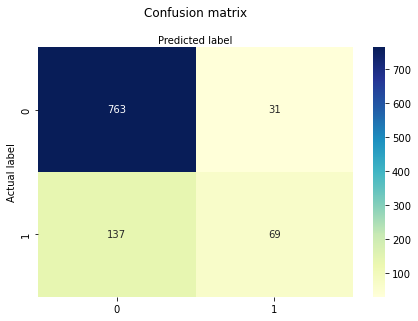

In [90]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [91]:
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.411466
         Iterations 18


In [23]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 9000
Model:                          Logit   Df Residuals:                     8989
Method:                           MLE   Df Model:                           10
Date:                Sat, 08 Jan 2022   Pseudo R-squ.:                 0.06683
Time:                        23:42:38   Log-Likelihood:                -4242.4
converged:                       True   LL-Null:                       -4546.3
Covariance Type:            nonrobust   LLR p-value:                4.072e-124
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Tenure             -0.0185      0.009     -1.975      0.048      -0.037      -0.000
NumOfProducts      -0.1524      0.049     -3.109      0.002      -0.248      -0.056
HasCrCard          -0.0799      

In [92]:
yhat = log_reg.predict(X_test)
prediction = list(map(round, yhat))


from sklearn.metrics import (confusion_matrix,
                           accuracy_score)

cm = confusion_matrix(y_test, prediction)
print ("Confusion Matrix : \n", cm)
 
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))

Confusion Matrix : 
 [[763  31]
 [137  69]]
Test accuracy =  0.832


In [101]:
#SVM
Lin_Kernel = svm.SVC(kernel='rbf')
Linear_SVM = Lin_Kernel.fit(X_train, y_train)
Linear_SVM_Pred = Lin_Kernel.predict(X_test)

In [102]:
cnf_matrix = metrics.confusion_matrix(y_test, Linear_SVM_Pred)
cnf_matrix

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.832
Precision: 0.69
Recall: 0.33495145631067963
